# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

In [4]:
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy as cp

## Generate Cities List

In [5]:
#Grab list of cities based on coordinates from citipy
citylist = []
count = 0
dup = 'no'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = cp.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(citylist) == 0:
            citylist.append(citdict)
            count+=1
            continue
        else:
            #Get rid of duplicates
            for city in citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            citylist.append(citdict)
            count+=1
        else:
            dup = 'no'

print(len(citylist))

7957


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Create dataframe. Grab 500 random cities
citypd = pd.DataFrame({'city': [x['city'] for x in citylist],
    'country': [x['country'] for x in citylist],})

samplecity = citypd.sample(500)
samplecity

,city,country
7575,brae,gb
6293,konstantinovka,ru
6395,sol-iletsk,ru
4545,tikrit,iq
6618,pinsk,by
5545,mandalgovi,mn
1831,anloga,gh
2869,sinnar,sd
629,caxambu,br
560,ellisras,za


In [12]:
# Save dataframe to csv file
citypd.to_csv("CitiesWeatherInfo.csv")

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
apikey = 'Enter Your API Key'
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Metric"
count = 0
samplecity['latitude'] = ""
samplecity['longitude'] = ""
samplecity['temperature'] = ""
samplecity['humidity'] = ""
samplecity['cloudiness'] = ""
samplecity['wind_speed'] = ""

for index,row in samplecity.iterrows():
    count+= 1
    query_url = url + "appid=" + apikey + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
#         print(cityweather)
        samplecity.set_value(index, "latitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "longitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "temperature", int(cityweather['main']['temp']))
        samplecity.set_value(index, "humidity", int(cityweather['main']['humidity']))
        samplecity.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        samplecity.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
    except:
        print(f"No data for this city: {row['city']}")
    print(f"This is city#: {count}")
    print(f"This is: {row['city']}" )
    print(f"This is the requested URL: {query_url}")

No data for this city: brae
This is city#: 1
This is: brae
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=Enter Your API Key&units=Metric&q=brae
No data for this city: konstantinovka
This is city#: 2
This is: konstantinovka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=Enter Your API Key&units=Metric&q=konstantinovka
No data for this city: sol-iletsk
This is city#: 3
This is: sol-iletsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=Enter Your API Key&units=Metric&q=sol-iletsk
No data for this city: tikrit
This is city#: 4
This is: tikrit
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=Enter Your API Key&units=Metric&q=tikrit
No data for this city: pinsk
This is city#: 5
This is: pinsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=Enter Your API Key&units=Metric&q=pinsk
No data for this city: mandalgovi
This is city#: 6
Th

No data for this city: eucaliptus
This is city#: 223
This is: eucaliptus
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=Enter Your API Key&units=Metric&q=eucaliptus
No data for this city: fort william
This is city#: 224
This is: fort william
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=Enter Your API Key&units=Metric&q=fort william
No data for this city: asbe teferi
This is city#: 225
This is: asbe teferi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=Enter Your API Key&units=Metric&q=asbe teferi
No data for this city: taburao
This is city#: 226
This is: taburao
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=Enter Your API Key&units=Metric&q=taburao
No data for this city: syedove
This is city#: 227
This is: syedove
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=Enter Your API Key&units=Metric&q=syedove
No data for this ci

No data for this city: decatur
This is city#: 464
This is: decatur
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=Enter Your API Key&units=Metric&q=decatur
No data for this city: neumunster
This is city#: 465
This is: neumunster
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=Enter Your API Key&units=Metric&q=neumunster
No data for this city: say
This is city#: 466
This is: say
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=Enter Your API Key&units=Metric&q=say
No data for this city: vikersund
This is city#: 467
This is: vikersund
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=Enter Your API Key&units=Metric&q=vikersund
No data for this city: bobrov
This is city#: 468
This is: bobrov
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=Enter Your API Key&units=Metric&q=bobrov
No data for this city: tymovskoye
This is city#: 469
Th

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

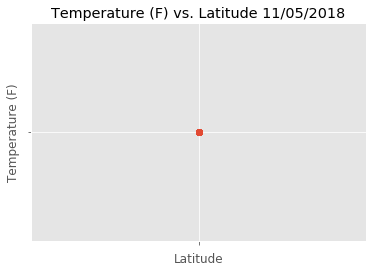

In [13]:
# import datetime
# date = datetime.date.today()
import time
date = time.strftime("%m/%d/%Y")
# print(date)
plt.scatter(samplecity['latitude'],samplecity['temperature'])
plt.title(f"Temperature (F) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

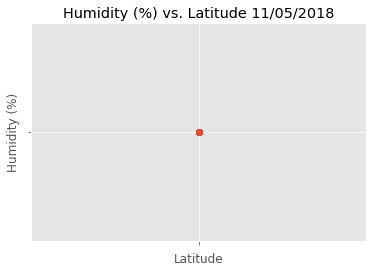

In [9]:
# plt.scatter(latitude,humidity)
plt.scatter(samplecity['latitude'], samplecity['humidity'])
plt.title(f"Humidity (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

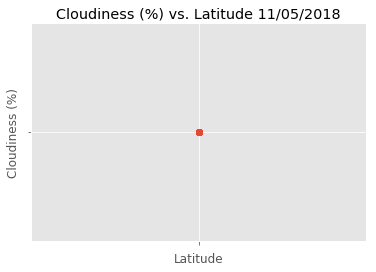

In [10]:
# plt.scatter(latitude,cloudy)
plt.scatter(samplecity['latitude'], samplecity['cloudiness'])
plt.title(f"Cloudiness (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

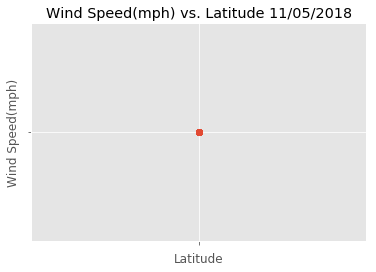

In [11]:
# plt.scatter(latitude,windspeed)
plt.scatter(samplecity['latitude'], samplecity['wind_speed'])
plt.title(f"Wind Speed(mph) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.savefig("Wind_Speed.png")
plt.show()